In [1]:
# load data using pandas and save data in padnas DataFrame object
import pandas as pd
data = pd.read_csv('OnlineRetail.csv', encoding="ISO-8859-1")

In [2]:
# first 5 rows of dataset
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [3]:
# shape of dataset
data.shape

(541909, 8)

In [4]:
# dataset information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:
# how many NaN values we have in dataset?
data.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [6]:
# drop NaN values from dataset
data=data.dropna(axis=0)

In [7]:
# how many NaN values we have in dataset?
data.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [8]:
# shape of dataset after removing NaN values
data.shape

(406829, 8)

In [9]:
# data.groupby('Country')['CustomerID'].count()

In [10]:
# create new column 
data['newCountry'] = 'United Kingdom'
data.loc[data['Country']!='United Kingdom','newCountry'] = 'Rest' 

In [11]:
data.groupby('newCountry')['CustomerID'].count()

newCountry
Rest               44951
United Kingdom    361878
Name: CustomerID, dtype: int64

In [12]:
# drop columns from dataset
data = data.drop(columns=['Description'])

In [13]:
#convert the string date field to datetime
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

In [14]:
data.head(200)

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,newCountry
0,536365,85123A,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,United Kingdom
1,536365,71053,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,United Kingdom
2,536365,84406B,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,United Kingdom
3,536365,84029G,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,United Kingdom
4,536365,84029E,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,United Kingdom
...,...,...,...,...,...,...,...,...
195,536388,22469,12,2010-12-01 09:59:00,1.65,16250.0,United Kingdom,United Kingdom
196,536388,22242,12,2010-12-01 09:59:00,1.65,16250.0,United Kingdom,United Kingdom
197,536389,22941,6,2010-12-01 10:03:00,8.50,12431.0,Australia,Rest
198,536389,21622,8,2010-12-01 10:03:00,4.95,12431.0,Australia,Rest


In [15]:
data['InvoiceDates'] = pd.to_datetime(data['InvoiceDate']).dt.date
data['InvoiceTime'] = pd.to_datetime(data['InvoiceDate']).dt.time

In [16]:
data.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,newCountry,InvoiceDates,InvoiceTime
0,536365,85123A,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,United Kingdom,2010-12-01,08:26:00
1,536365,71053,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,United Kingdom,2010-12-01,08:26:00
2,536365,84406B,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,United Kingdom,2010-12-01,08:26:00
3,536365,84029G,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,United Kingdom,2010-12-01,08:26:00
4,536365,84029E,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,United Kingdom,2010-12-01,08:26:00


In [17]:
print("Max invoice date is {}, min invoice date is {}.".format(data['InvoiceDates'].max(), data['InvoiceDates'].min()))

Max invoice date is 2011-12-09, min invoice date is 2010-12-01.


In [18]:
pd.set_option("precision", 5)
data.groupby('newCountry').agg({'InvoiceNo':'count',
                                 'CustomerID':'nunique',
                                'Quantity':['sum', 'mean', 'min', 'max'],
                                'UnitPrice':['sum', 'mean', 'min', 'max']})

InvoiceNo CustomerID Quantity                          \
                   count    nunique      sum      mean    min    max   
newCountry                                                             
Rest               44951        422   898355  19.98521   -624   2400   
United Kingdom    361878       3950  4008533  11.07703 -80995  80995   

                  UnitPrice                          
                        sum     mean  min       max  
newCountry                                           
Rest            2.29543e+05  5.10651  0.0   4161.06  
United Kingdom  1.17828e+06  3.25601  0.0  38970.00

In [19]:
# we want only positive Quantity in dataset

data = data[data['Quantity']>0]

In [20]:
data.groupby('newCountry').agg({'InvoiceNo':'count',
                                'CustomerID':'nunique',
                                'Quantity':['sum', 'mean', 'min', 'max'],
                                'UnitPrice':['sum', 'mean', 'min', 'max']})

InvoiceNo CustomerID Quantity                       \
                   count    nunique      sum      mean min    max   
newCountry                                                          
Rest               43579        418   912224  20.93265   1   2400   
United Kingdom    354345       3921  4269472  12.04891   1  80995   

                  UnitPrice                         
                        sum     mean  min      max  
newCountry                                          
Rest            1.89795e+05  4.35520  0.0  4161.06  
United Kingdom  1.05021e+06  2.96379  0.0  8142.75

<AxesSubplot:xlabel='Quantity', ylabel='UnitPrice'>

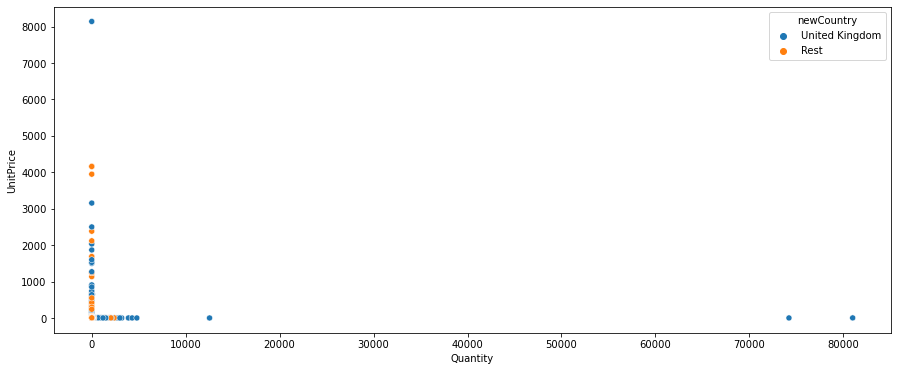

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,6))
sns.scatterplot(data=data, x='Quantity', y='UnitPrice', hue='newCountry')

In [22]:
data[['Quantity', 'UnitPrice']].describe(percentiles=[.1, .2, .25, .3, .4, .5, .6, .7, .75, .8, .9, .95, .99]).transpose()

,count,mean,std,min,10%,20%,25%,30%,40%,50%,60%,70%,75%,80%,90%,95%,99%,max
Quantity,397924.0,13.02182,180.42021,1.0,1.00,2.00,2.00,2.00,4.00,6.00,8.0,12.00,12.00,12.00,24.00,36.0,120.00,80995.00
UnitPrice,397924.0,3.11617,22.09679,0.0,0.55,0.85,1.25,1.25,1.65,1.95,2.1,2.95,3.75,4.15,6.35,8.5,14.95,8142.75


In [23]:
data[(data['Quantity']<=120) & (data['UnitPrice'] < 3000)][['Quantity', 'UnitPrice']].describe(percentiles=[.1, .2, .25, .3, .4, .5, .6, .7, .75, .8, .9, .95, .99]).transpose()

,count,mean,std,min,10%,20%,25%,30%,40%,50%,60%,70%,75%,80%,90%,95%,99%,max
Quantity,394023.0,9.83747,14.53787,1.0,1.00,2.00,2.00,2.00,3.00,5.00,7.0,12.00,12.00,12.00,24.00,32.0,96.00,120.0
UnitPrice,394023.0,3.07385,13.13016,0.0,0.55,0.85,1.25,1.25,1.65,1.95,2.1,2.95,3.75,4.15,6.45,8.5,14.95,2500.0


In [24]:
import warnings
warnings.filterwarnings("ignore")

In [25]:
data = data[(data['Quantity']<=120) & (data['UnitPrice'] < 3000)]

<AxesSubplot:xlabel='Quantity', ylabel='Density'>

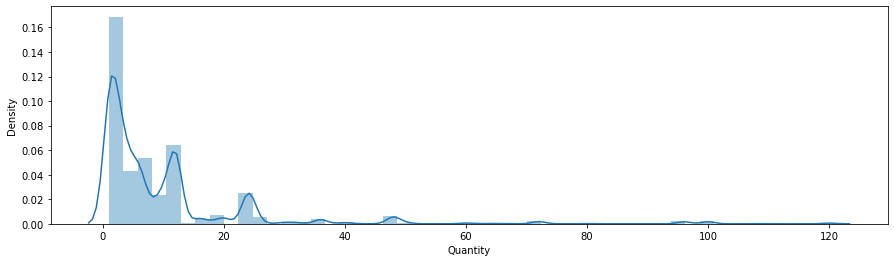

In [26]:
plt.figure(figsize=(15,4))
sns.distplot(data['Quantity'])

<AxesSubplot:xlabel='UnitPrice', ylabel='Density'>

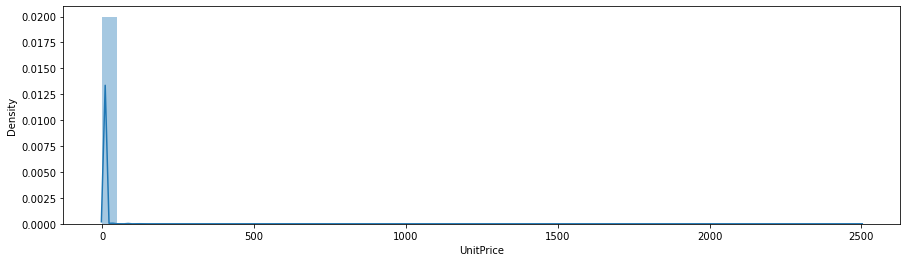

In [27]:
plt.figure(figsize=(15,4))
sns.distplot(data['UnitPrice'])

In [28]:
data.shape

(394023, 10)

In [29]:
data.head(200)

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,newCountry,InvoiceDates,InvoiceTime
0,536365,85123A,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,United Kingdom,2010-12-01,08:26:00
1,536365,71053,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,United Kingdom,2010-12-01,08:26:00
2,536365,84406B,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,United Kingdom,2010-12-01,08:26:00
3,536365,84029G,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,United Kingdom,2010-12-01,08:26:00
4,536365,84029E,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,United Kingdom,2010-12-01,08:26:00
...,...,...,...,...,...,...,...,...,...,...
202,536389,85014B,6,2010-12-01 10:03:00,5.95,12431.0,Australia,Rest,2010-12-01,10:03:00
203,536389,85014A,3,2010-12-01 10:03:00,5.95,12431.0,Australia,Rest,2010-12-01,10:03:00
204,536389,22193,2,2010-12-01 10:03:00,8.50,12431.0,Australia,Rest,2010-12-01,10:03:00
205,536389,22726,4,2010-12-01 10:03:00,3.75,12431.0,Australia,Rest,2010-12-01,10:03:00


In [30]:
print("Max invoice date is {}, min invoice date is {}.".format(data['InvoiceDates'].max(), data['InvoiceDates'].min()))

Max invoice date is 2011-12-09, min invoice date is 2010-12-01.


In [31]:
data = data[(data['InvoiceDate'] >= '2010-12-01') & (data['InvoiceDate'] < '2011-12-01')]

In [32]:
print("Max invoice date is {}, min invoice date is {}.".format(data['InvoiceDates'].max(), data['InvoiceDates'].min()))

Max invoice date is 2011-11-30, min invoice date is 2010-12-01.


In [33]:
data['purchaseMonth'] = data['InvoiceDates'].values.astype('datetime64[M]')
data.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,newCountry,InvoiceDates,InvoiceTime,purchaseMonth
0,536365,85123A,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,United Kingdom,2010-12-01,08:26:00,2010-12-01
1,536365,71053,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,United Kingdom,2010-12-01,08:26:00,2010-12-01
2,536365,84406B,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,United Kingdom,2010-12-01,08:26:00,2010-12-01
3,536365,84029G,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,United Kingdom,2010-12-01,08:26:00,2010-12-01
4,536365,84029E,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,United Kingdom,2010-12-01,08:26:00,2010-12-01


In [34]:
data_summ = pd.DataFrame(data.groupby('purchaseMonth').agg({'InvoiceNo':'count',
                                'CustomerID':'nunique',
                                'Quantity':['sum', 'mean', 'min', 'max'],
                                'UnitPrice':['sum', 'mean', 'min', 'max']}))

In [35]:
data_summ.columns

MultiIndex([( 'InvoiceNo',   'count'),
            ('CustomerID', 'nunique'),
            (  'Quantity',     'sum'),
            (  'Quantity',    'mean'),
            (  'Quantity',     'min'),
            (  'Quantity',     'max'),
            ( 'UnitPrice',     'sum'),
            ( 'UnitPrice',    'mean'),
            ( 'UnitPrice',     'min'),
            ( 'UnitPrice',     'max')],
           )

In [36]:
names = []
for i in data_summ.columns:
    name = i[0] + ' ' + i[1]
    names.append(name)

data_summ.columns = names

In [37]:
data_summ

,InvoiceNo count,CustomerID nunique,Quantity sum,Quantity mean,Quantity min,Quantity max,UnitPrice sum,UnitPrice mean,UnitPrice min,UnitPrice max
purchaseMonth,,,,,,,,,,
2010-12-01,25917,870,237778,9.17460,1,120,81603.850,3.14866,0.00,295.00
2011-01-01,21034,733,215835,10.26124,1,120,66683.760,3.17028,0.00,295.00
2011-02-01,19716,745,197658,10.02526,1,120,62943.770,3.19252,0.00,320.69
2011-03-01,26880,964,263668,9.80908,1,120,88179.730,3.28050,0.00,1687.17
2011-04-01,22435,844,218379,9.73385,1,120,78800.741,3.51240,0.00,2382.92
2011-05-01,28031,1042,290221,10.35357,1,120,93622.920,3.33998,0.00,1241.98
2011-06-01,26877,983,278519,10.36273,1,120,84811.370,3.15554,0.04,700.00
2011-07-01,26512,940,283916,10.70896,1,120,75469.871,2.84663,0.00,550.94
2011-08-01,26640,921,293210,11.00638,1,120,78930.130,2.96284,0.00,2500.00


<AxesSubplot:title={'center':'Quantity Sum, UnitPrice Sum & InvoiceNo count'}, xlabel='purchaseMonth'>

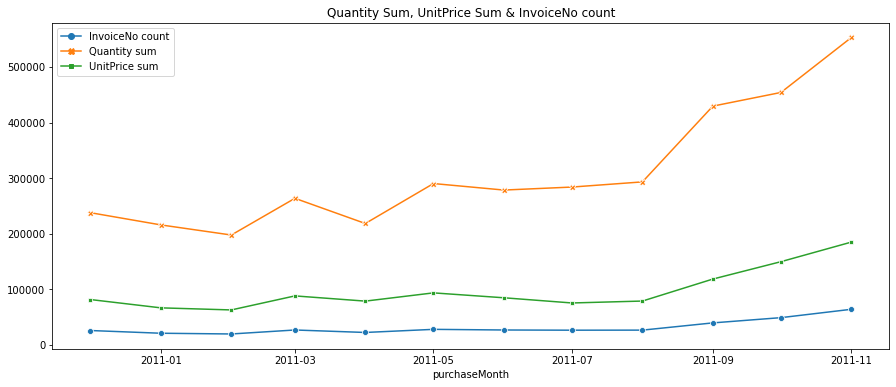

In [38]:
plt.figure(figsize=(15,6))
plt.title('Quantity Sum, UnitPrice Sum & InvoiceNo count')
sns.lineplot(data=data_summ[['InvoiceNo count', 'Quantity sum', 'UnitPrice sum']], markers=True, dashes=False)

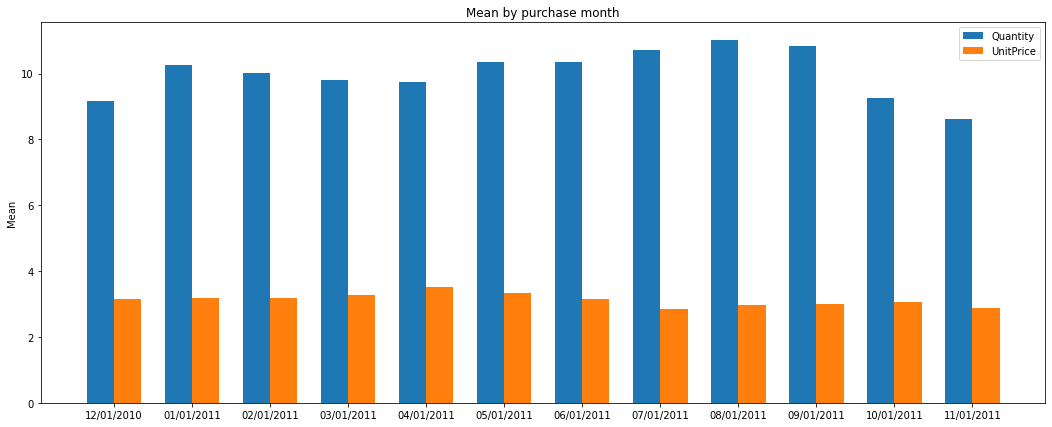

In [39]:
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt

labels = pd.Series(data_summ.index).dt.strftime('%m/%d/%Y')
quantity_means = data_summ['Quantity mean']
unitprice_means = data_summ['UnitPrice mean']

x = np.arange(len(labels))  # the label locations
width = 0.35 # the width of the bars

fig, ax = plt.subplots(figsize=(18,7))
rects1 = ax.bar(x - width/2, quantity_means, width, label='Quantity')
rects2 = ax.bar(x + width/2, unitprice_means, width, label='UnitPrice')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Mean')
ax.set_title('Mean by purchase month')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

In [40]:
data.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,newCountry,InvoiceDates,InvoiceTime,purchaseMonth
0,536365,85123A,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,United Kingdom,2010-12-01,08:26:00,2010-12-01
1,536365,71053,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,United Kingdom,2010-12-01,08:26:00,2010-12-01
2,536365,84406B,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,United Kingdom,2010-12-01,08:26:00,2010-12-01
3,536365,84029G,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,United Kingdom,2010-12-01,08:26:00,2010-12-01
4,536365,84029E,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,United Kingdom,2010-12-01,08:26:00,2010-12-01


In [41]:
# number of distinct customers
data['CustomerID'].nunique()

4264

In [42]:
customer = pd.DataFrame(data.groupby('CustomerID').agg({'InvoiceNo':'count',
                                'InvoiceDates':['min', 'max'],
                                'Quantity':['min', 'max', 'sum', 'mean', 'median'],
                                'UnitPrice':['min', 'max', 'mean', 'median']}))
customer.reset_index(level=0, inplace=True)

In [43]:
customer.head()

CustomerID InvoiceNo InvoiceDates             Quantity                       \
                 count          min         max      min  max   sum      mean   
0    12347.0       170   2010-12-07  2011-10-31        2   48  2026  11.91765   
1    12348.0        25   2010-12-16  2011-09-25        1  120  1477  59.08000   
2    12349.0        73   2011-11-21  2011-11-21        1   36   631   8.64384   
3    12350.0        17   2011-02-02  2011-02-02        1   24   197  11.58824   
4    12352.0        85   2011-02-16  2011-11-03        1   16   536   6.30588   

         UnitPrice                           
  median       min     max      mean median  
0   12.0      0.25   12.75   2.74488   2.10  
1   72.0      0.29   40.00   7.07880   0.85  
2    6.0      0.42  300.00   8.28904   2.55  
3   12.0      0.85   40.00   3.84118   1.65  
4    4.0      0.65  376.50  15.93071   4.25

In [44]:
names = []
for i in customer.columns:
    name = i[0] + ' ' + i[1]
    names.append(name)

customer.columns = names

In [45]:
customer.head()

,CustomerID,InvoiceNo count,InvoiceDates min,InvoiceDates max,Quantity min,Quantity max,Quantity sum,Quantity mean,Quantity median,UnitPrice min,UnitPrice max,UnitPrice mean,UnitPrice median
0,12347.0,170,2010-12-07,2011-10-31,2,48,2026,11.91765,12.0,0.25,12.75,2.74488,2.10
1,12348.0,25,2010-12-16,2011-09-25,1,120,1477,59.08000,72.0,0.29,40.00,7.07880,0.85
2,12349.0,73,2011-11-21,2011-11-21,1,36,631,8.64384,6.0,0.42,300.00,8.28904,2.55
3,12350.0,17,2011-02-02,2011-02-02,1,24,197,11.58824,12.0,0.85,40.00,3.84118,1.65
4,12352.0,85,2011-02-16,2011-11-03,1,16,536,6.30588,4.0,0.65,376.50,15.93071,4.25


In [46]:
customer['InvoiceDates min'] = pd.to_datetime(customer['InvoiceDates min'])
customer['InvoiceDates max'] = pd.to_datetime(customer['InvoiceDates max'])
customer.dtypes

CustomerID                 float64
InvoiceNo count              int64
InvoiceDates min    datetime64[ns]
InvoiceDates max    datetime64[ns]
Quantity min                 int64
Quantity max                 int64
Quantity sum                 int64
Quantity mean              float64
Quantity median            float64
UnitPrice min              float64
UnitPrice max              float64
UnitPrice mean             float64
UnitPrice median           float64
dtype: object

In [47]:
# Recency = 2011-11-31 - last purchase date 
# last purchase date = InvoiceDates max

customer['Recency'] = (customer['InvoiceDates max'].max() - customer['InvoiceDates max']).dt.days

In [48]:
customer.head()

,CustomerID,InvoiceNo count,InvoiceDates min,InvoiceDates max,Quantity min,Quantity max,Quantity sum,Quantity mean,Quantity median,UnitPrice min,UnitPrice max,UnitPrice mean,UnitPrice median,Recency
0,12347.0,170,2010-12-07,2011-10-31,2,48,2026,11.91765,12.0,0.25,12.75,2.74488,2.10,30
1,12348.0,25,2010-12-16,2011-09-25,1,120,1477,59.08000,72.0,0.29,40.00,7.07880,0.85,66
2,12349.0,73,2011-11-21,2011-11-21,1,36,631,8.64384,6.0,0.42,300.00,8.28904,2.55,9
3,12350.0,17,2011-02-02,2011-02-02,1,24,197,11.58824,12.0,0.85,40.00,3.84118,1.65,301
4,12352.0,85,2011-02-16,2011-11-03,1,16,536,6.30588,4.0,0.65,376.50,15.93071,4.25,27


In [49]:
data['pom'] = data['Quantity']*data['UnitPrice']
cust_monetary = pd.DataFrame(data.groupby('CustomerID')['pom'].sum())
cust_monetary.reset_index(level=0, inplace=True)

In [50]:
cust_monetary.head()

,CustomerID,pom
0,12347.0,3835.58
1,12348.0,1546.68
2,12349.0,1757.55
3,12350.0,334.40
4,12352.0,2506.04


In [51]:
customer = pd.concat([customer, cust_monetary['pom']], axis=1)

In [52]:
customer['Monetary'] = customer['pom']
customer = customer.drop(columns=['pom'])

In [53]:
customer['Frequency'] = customer['InvoiceNo count']

In [54]:
customer['Tenure'] = (customer['InvoiceDates max'].max() - customer['InvoiceDates min']).dt.days
customer.head()

,CustomerID,InvoiceNo count,InvoiceDates min,InvoiceDates max,Quantity min,Quantity max,Quantity sum,Quantity mean,Quantity median,UnitPrice min,UnitPrice max,UnitPrice mean,UnitPrice median,Recency,Monetary,Frequency,Tenure
0,12347.0,170,2010-12-07,2011-10-31,2,48,2026,11.91765,12.0,0.25,12.75,2.74488,2.10,30,3835.58,170,358
1,12348.0,25,2010-12-16,2011-09-25,1,120,1477,59.08000,72.0,0.29,40.00,7.07880,0.85,66,1546.68,25,349
2,12349.0,73,2011-11-21,2011-11-21,1,36,631,8.64384,6.0,0.42,300.00,8.28904,2.55,9,1757.55,73,9
3,12350.0,17,2011-02-02,2011-02-02,1,24,197,11.58824,12.0,0.85,40.00,3.84118,1.65,301,334.40,17,301
4,12352.0,85,2011-02-16,2011-11-03,1,16,536,6.30588,4.0,0.65,376.50,15.93071,4.25,27,2506.04,85,287


<AxesSubplot:xlabel='Recency', ylabel='Density'>

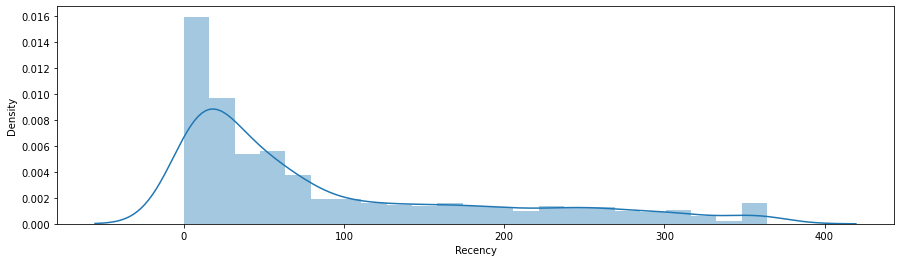

In [55]:
plt.figure(figsize=(15,4))
sns.distplot(customer['Recency'])

<AxesSubplot:xlabel='Tenure', ylabel='Density'>

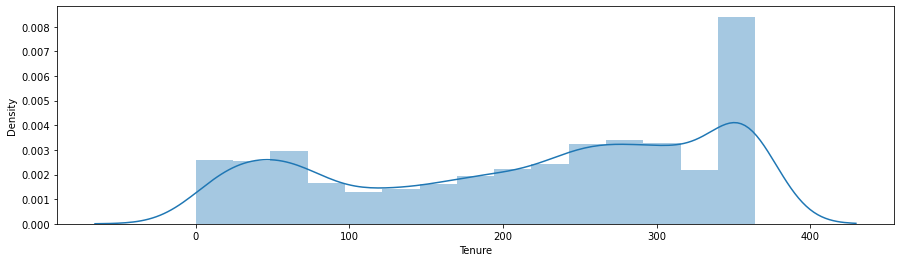

In [56]:
plt.figure(figsize=(15,4))
sns.distplot(customer['Tenure'])

<AxesSubplot:xlabel='Monetary', ylabel='Density'>

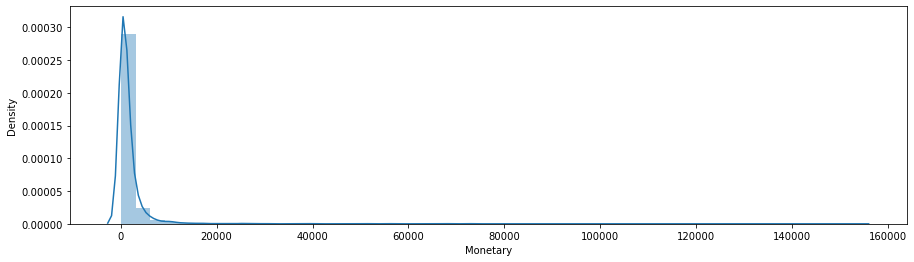

In [57]:
plt.figure(figsize=(15,4))
sns.distplot(customer['Monetary'])

<AxesSubplot:xlabel='Frequency', ylabel='Density'>

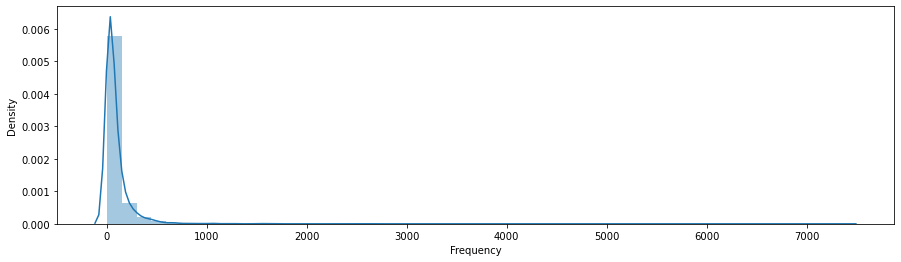

In [58]:
plt.figure(figsize=(15,4))
sns.distplot(customer['Frequency'])

<AxesSubplot:xlabel='Frequency', ylabel='Monetary'>

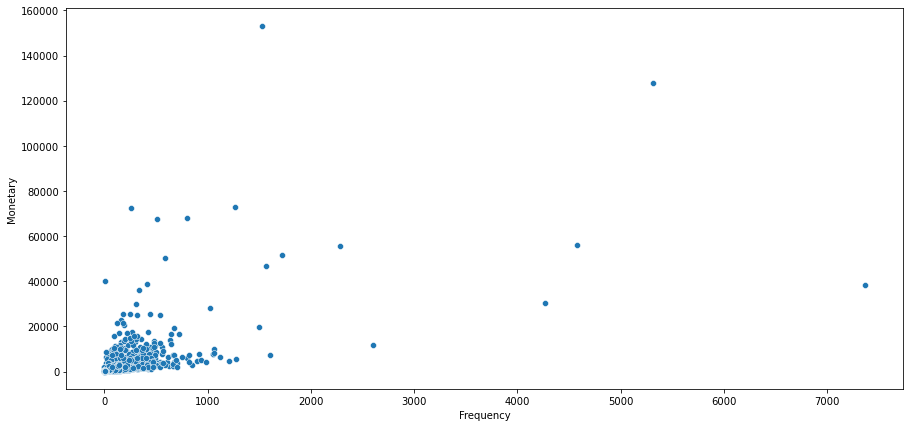

In [59]:
plt.figure(figsize=(15,7))

sns.scatterplot(
    data=customer, x="Frequency", y="Monetary", sizes=(20, 200), hue_norm=(0, 4), legend="full"
)

<AxesSubplot:xlabel='Recency', ylabel='Frequency'>

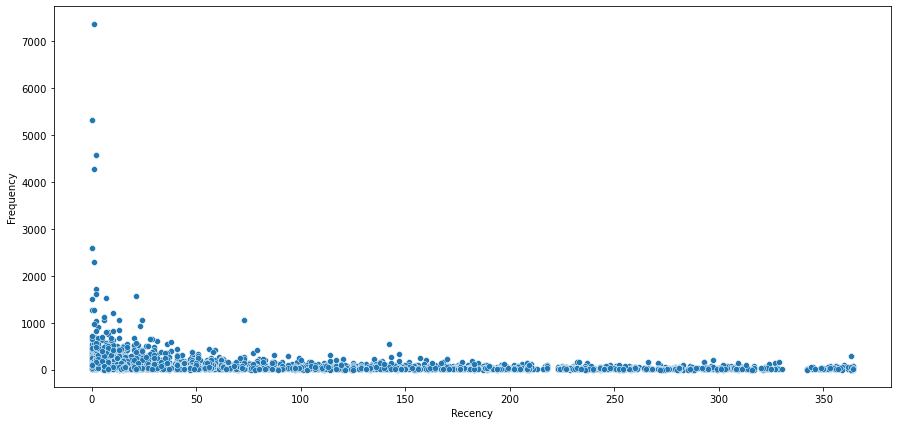

In [60]:
plt.figure(figsize=(15,7))

sns.scatterplot(
    data=customer, x="Recency", y="Frequency", sizes=(20, 200), hue_norm=(0, 4), legend="full"
)

<AxesSubplot:xlabel='Recency', ylabel='Monetary'>

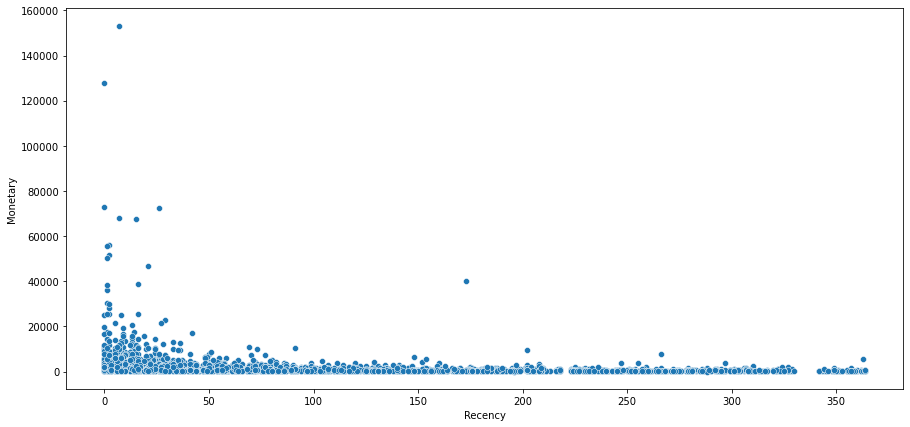

In [61]:
plt.figure(figsize=(15,7))

sns.scatterplot(
    data=customer, x="Recency", y="Monetary", sizes=(20, 200), hue_norm=(0, 4), legend="full"
)

In [62]:
#function for ordering cluster numbers

def order_cluster(cluster_field_name, target_field_name,df,ascending):
    new_cluster_field_name = 'new_' + cluster_field_name
    df_new = df.groupby(cluster_field_name)[target_field_name].mean().reset_index()
    df_new = df_new.sort_values(by=target_field_name,ascending=ascending).reset_index(drop=True)
    df_new['index'] = df_new.index
    df_final = pd.merge(df,df_new[[cluster_field_name,'index']], on=cluster_field_name)
    df_final = df_final.drop([cluster_field_name],axis=1)
    df_final = df_final.rename(columns={"index":cluster_field_name})
    return df_final

In [63]:
from sklearn.cluster import KMeans

In [64]:
kmeans = KMeans(n_clusters=4, random_state=1)
kmeans.fit(customer[['Recency']])
customer['recencyCluster'] = kmeans.predict(customer[['Recency']])

customer = order_cluster('recencyCluster', 'Recency', customer, False)

In [65]:
kmeans = KMeans(n_clusters=4, random_state=2)
kmeans.fit(customer[['Monetary']])
customer['monetaryCluster'] = kmeans.predict(customer[['Monetary']])

customer = order_cluster('monetaryCluster', 'Monetary', customer, True)

In [66]:
kmeans = KMeans(n_clusters=4, random_state=2)
kmeans.fit(customer[['Frequency']])
customer['frequencyCluster'] = kmeans.predict(customer[['Frequency']])

customer = order_cluster('frequencyCluster', 'Frequency', customer, True)

In [67]:
kmeans = KMeans(n_clusters=4, random_state=2)
kmeans.fit(customer[['Tenure']])
customer['tenureCluster'] = kmeans.predict(customer[['Tenure']])

customer = order_cluster('tenureCluster', 'Tenure', customer, True)

In [68]:
kmeans = KMeans(n_clusters=4, random_state=22)
kmeans.fit(customer[['recencyCluster', 'frequencyCluster', 'monetaryCluster','tenureCluster']])
customer['ClusterRFMT'] = kmeans.predict(customer[['recencyCluster', 'frequencyCluster', 'monetaryCluster','tenureCluster']])

customer = order_cluster('ClusterRFMT', 'Frequency', customer, True)

In [69]:
customer.groupby('ClusterRFMT').agg({'Recency':['count', 'mean', 'median'],
                                 'Frequency':['mean', 'median'],
                                 'Monetary':['mean', 'median'],
                                 'Tenure':['mean', 'median']})

Recency                    Frequency           Monetary            \
              count       mean median       mean median        mean    median   
ClusterRFMT                                                                     
0               636  276.35692    279   31.33648     19   499.04321   307.210   
1               973  137.07194    138   43.07503     27   816.09031   477.910   
2              1345   32.31970     26   54.72268     30   771.93405   430.500   
3              1310   25.73817     17  184.29847    113  3636.36457  1891.805   

                Tenure         
                  mean median  
ClusterRFMT                    
0            313.91824    315  
1            208.46043    209  
2             73.47361     59  
3            319.06565    328

In [70]:
kmeans = KMeans(n_clusters=4, random_state=23)
kmeans.fit(customer[['recencyCluster', 'frequencyCluster', 'monetaryCluster']])
customer['ClusterRFM'] = kmeans.predict(customer[['recencyCluster', 'frequencyCluster', 'monetaryCluster']])

customer = order_cluster('ClusterRFM', 'Recency', customer, False)

In [71]:
customer.groupby('ClusterRFM').agg({'Recency':['count', 'mean', 'median'],
                                 'Frequency':['mean', 'median'],
                                 'Monetary':['mean', 'median'],
                                 'Tenure':['mean', 'median']})

Recency                    Frequency           Monetary            \
             count       mean median       mean median        mean    median   
ClusterRFM                                                                     
0             1149  235.12097  231.0   30.27676   19.0   519.68859   308.580   
1             1016   77.51673   70.0   53.93307   34.5   971.43229   638.135   
2             1662   19.14019   16.5   63.52768   53.0  1295.59910   786.745   
3              437   12.81236    9.0  415.80778  294.0  7267.62728  4147.960   

               Tenure         
                 mean median  
ClusterRFM                    
0           266.23673    268  
1           188.05118    177  
2           174.26715    175  
3           303.62471    349

<AxesSubplot:xlabel='Frequency', ylabel='Monetary'>

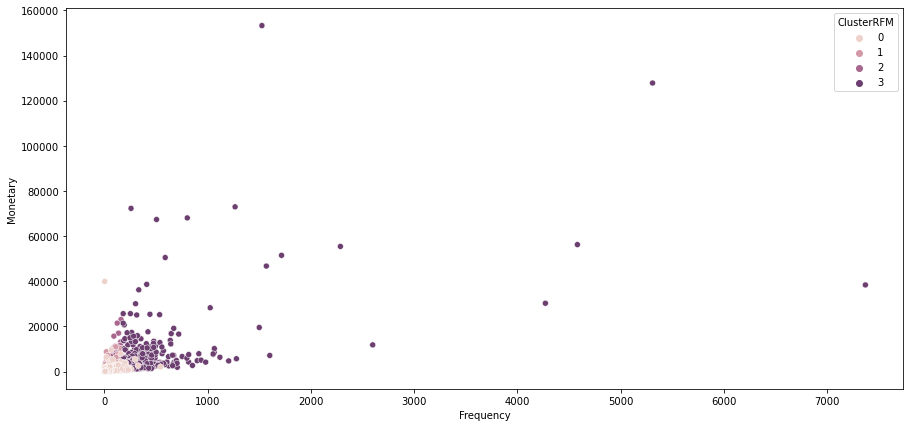

In [72]:
plt.figure(figsize=(15,7))

sns.scatterplot(
    data=customer, x="Frequency", y="Monetary", sizes=(20, 200), hue="ClusterRFM", hue_norm=(0, 4), legend="full"
)